## This notebook does some toy MC study to check what is the impact of resolution on azimuthal asymmetries. It generates a distribution that follows a sin function and then adds some gaussian noise. The decrease in height of the sin function is an estimate of the "dilution factor"

In [1]:
from scipy.stats import cosine, norm, uniform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
pseudodata = cosine(np.pi/2.0).rvs(size=100000) #sin
#pseudodata = cosine(np.pi/2.0).rvs(size=100000) #sin

pedestal = uniform(-np.pi/2.0, 2.0*np.pi).rvs(size=10000) #sin

smear = norm(0,0.3).rvs(size=100000)

(array([ 161.,  747., 1723., 2816., 4360., 5815., 7146., 8463., 9288.,
        9645., 9701., 8999., 8353., 7170., 5765., 4386., 2875., 1699.,
         738.,  150.]),
 array([-1.48523486, -1.1796288 , -0.87402275, -0.56841669, -0.26281063,
         0.04279543,  0.34840149,  0.65400755,  0.95961361,  1.26521967,
         1.57082573,  1.87643179,  2.18203785,  2.48764391,  2.79324996,
         3.09885602,  3.40446208,  3.71006814,  4.0156742 ,  4.32128026,
         4.62688632]),
 <a list of 1 Patch objects>)

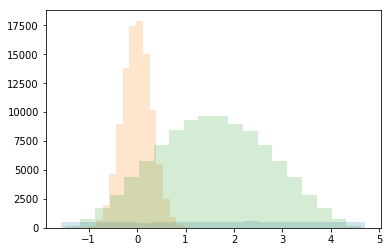

In [49]:
plt.hist(pedestal, histtype='stepfilled', alpha=0.2,bins=20)

plt.hist(smear, histtype='stepfilled', alpha=0.2,bins=20)
plt.hist(pseudodata, histtype='stepfilled', alpha=0.2,bins=20)

[1.53834808 1.06258958 0.9990017  0.98557875 0.97601684 0.98378631
 0.98004322 1.00420168 1.04407583 1.55434783]


(0.0, 20413.4)

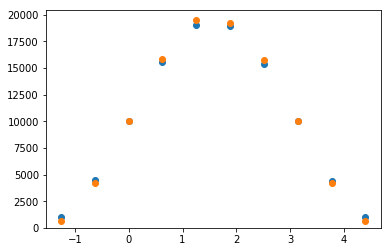

In [51]:
smeared,x = np.histogram(pseudodata+smear,bins=10,range=(-np.pi/2.0, 1.5*np.pi))
truth,x = np.histogram(pseudodata, bins=10,range=(-np.pi/2.0, 1.5*np.pi))

#ped,x = np.histogram(pedestal, bins=20,range=(-np.pi/2.0, 1.5*np.pi))

#smeared = smeared+ped
#truth = truth+ped
x = (x[1:]+x[:-1])/2


plt.plot(x,smeared,'o',label='smeared')
plt.plot(x,truth,'o',label='truth')

print np.true_divide(smeared,truth)
plt.ylim(bottom=0.0)

(array([  2.,   7.,   2.,   2.,   6.,  13.,  11.,   8.,  17.,  22.,  13.,
         17.,  27.,  30.,  25.,  35.,  36.,  45.,  40.,  55.,  51.,  57.,
         63.,  71.,  78.,  80., 119.,  95., 104., 134., 140., 120., 134.,
        127., 161., 169., 186., 188., 189., 187., 188., 195., 243., 215.,
        238., 219., 222., 213., 208., 212., 233., 236., 212., 206., 238.,
        208., 239., 207., 210., 203., 211., 181., 153., 172., 161., 140.,
        147., 132., 116., 122., 130.,  97.,  84.,  87.,  78.,  91.,  91.,
         63.,  65.,  47.,  49.,  36.,  37.,  31.,  42.,  26.,  26.,  21.,
         16.,  20.,  13.,  16.,  15.,   7.,   4.,   9.,   9.,   6.,   6.,
          0.]),
 array([-1.57079633e+00, -1.50796447e+00, -1.44513262e+00, -1.38230077e+00,
        -1.31946891e+00, -1.25663706e+00, -1.19380521e+00, -1.13097336e+00,
        -1.06814150e+00, -1.00530965e+00, -9.42477796e-01, -8.79645943e-01,
        -8.16814090e-01, -7.53982237e-01, -6.91150384e-01, -6.28318531e-01,
        -5.654

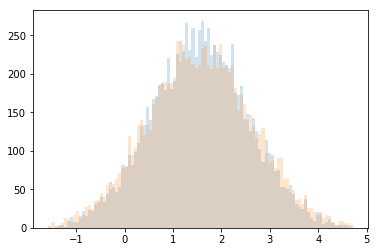

In [34]:
#pedestal = uniform(np.pi/2.0).rvs(size=1000) #sin
pseudodata = norm(np.pi/2.0,1.0).rvs(size=10000) #sin

plt.hist(pseudodata, histtype='stepfilled', alpha=0.2,bins=100,range=(-np.pi/2.0, 1.5*np.pi))
plt.hist(pseudodata+smear, histtype='stepfilled', alpha=0.2,bins=100,range=(-np.pi/2.0, 1.5*np.pi))